In [1]:
from VariNet.utils.train import train_vae_MNIST, train_avae_toy, train_avae_MNIST, train_vae_toy
from VariNet.models.vae import MnistVAE, ToyVAE
from VariNet.models.avae import MnistAVAE, ToyAVAE
import json
import torch

# Create examples directory
from pathlib import Path
Path("examples").mkdir(parents=True, exist_ok=True)

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

/home/missa/miniconda3/envs/pgm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Example to train a VAE on MNIST (no binarization)
train_vae_MNIST(batch_size = 128,
                z_dim = 32,
                lr = 1e-3,
                epochs = 1,
                image_size = 32,
                input_channels = 1,
                results_folder = "examples/vae_MNIST",
                binary = False,
                decoder_features = 32,
                encoder_features = 32)

Epoch 0 Mean Loss: 982.6483154296875


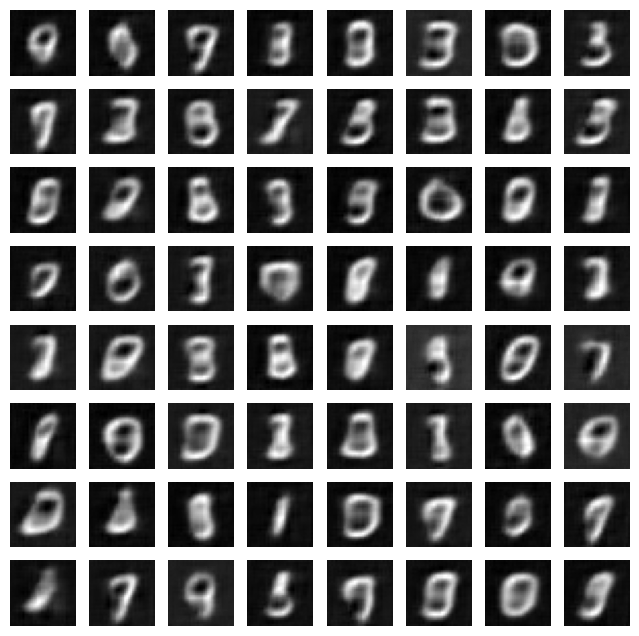

In [11]:
# Example to load trained VAE and generate samples

# Load model parameters
with open('examples/vae_MNIST/params.json') as f:
    params = json.load(f)

# Load model weights
vae = MnistVAE(
            in_channels=params['input_channels'],
            input_size=params['image_size'],
            z_dim=params['z_dim'],
            decoder_features=params['decoder_features'],
            encoder_features=params['encoder_features'],
            device=device
            )

vae.load_state_dict(torch.load('examples/vae_MNIST/model.pth', map_location=torch.device(device)))
vae.to(device)

# Sample from the model
vae.eval()
samples = vae.sample(batch_size=64).detach().cpu().numpy().squeeze()

# Plot samples
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(samples[i*8+j], cmap='gray')
        ax[i, j].axis('off')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 30.68it/s]


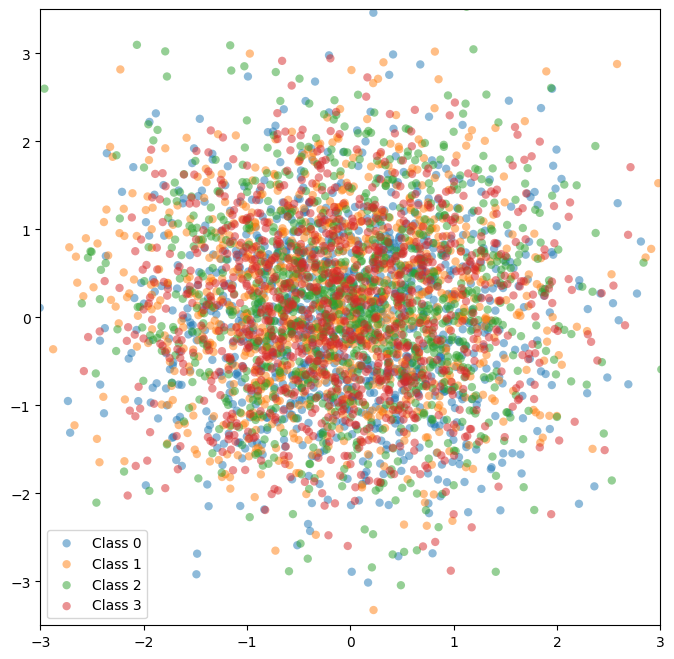

In [10]:
# Example to train an AVAE on MNIST (no binarization)
train_vae_toy(batch_size = 512,
                lr = 1e-4,
                results_folder = "examples/vae_toy",
                nb_samples = 100)

In [6]:
# Example to train an AVAE on MNIST (no binarization)
train_avae_MNIST(batch_size = 64,
                z_dim = 16,
                primal_lr = 1e-3,
                adv_lr = 1e-4,
                epochs = 1,
                image_size = 16,
                input_channels = 1,
                results_folder = "examples/avae_mnist",
                binary = False,
                decoder_features = 16,
                encoder_features = 16)

Epoch 0 Mean Loss: 265.6911926269531


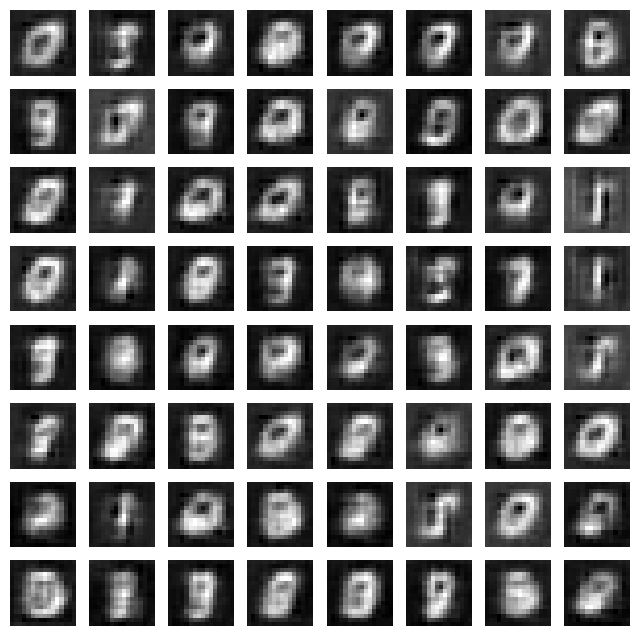

In [7]:
# Load model parameters
with open('examples/avae_mnist/params.json') as f:
    params = json.load(f)

# Load model weights
vae = MnistAVAE(
            in_channels=params['input_channels'],
            input_size=params['image_size'],
            z_dim=params['z_dim'],
            decoder_features=params['decoder_features'],
            encoder_features=params['encoder_features'],
            device=device
            )

vae.load_state_dict(torch.load('examples/avae_mnist/model.pth', map_location=torch.device(device)))
vae.to(device)

# Sample from the model
vae.eval()
samples = vae.sample(batch_size=64).detach().cpu().numpy().squeeze()

# Plot samples
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(samples[i*8+j], cmap='gray')
        ax[i, j].axis('off')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:09<00:00, 14.29it/s]


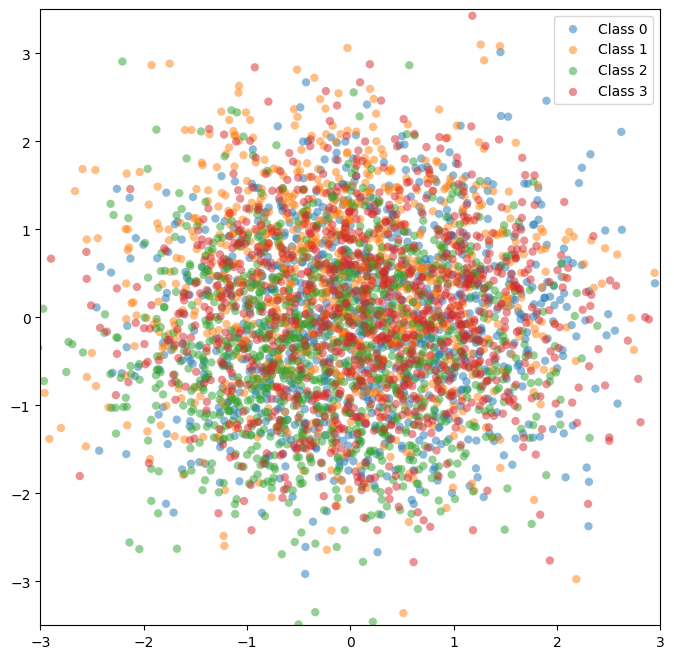

In [9]:
train_avae_toy(batch_size = 512,
                primal_lr = 1e-4,
                adv_lr = 1e-4,
                results_folder = "examples/avae_toy",
                nb_samples = 1000)